In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive

# Kết nối với Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df1 = df = pd.read_excel('/content/drive/MyDrive/data_scholar/kì_1.xlsx')
df2 = df = pd.read_excel('/content/drive/MyDrive/data_scholar/kì 2.xlsx')

In [4]:
df1['ki_hoc'] = 1

In [5]:
df1.head()

,TT,Khoa,Nganh,Muc_hb,GPA,drl,HB,ki_hoc
0,1,61,Công nghệ da giày,B,3.2,80,3.29,1
1,2,61,Công nghệ may,A,3.6,90,3.78,1
2,3,61,Công nghệ may,B,3.2,80,3.84,1
3,4,61,Công nghệ thông tin,A,3.6,90,3.60,1
4,5,61,Công nghệ thông tin,B,3.2,80,3.43,1


In [6]:
df2['ki_hoc'] = 2

In [7]:
df2.head()

,MSSV,Nganh,Trường/ Viện,Khoa,GPA,drl,Muc_hb,ki_hoc
0,20186271,"Công nghệ dệt, may","Viện Dệt may, Da giầy và thời trang",63.0,3.40,66.0,C,2
1,20187265,Công nghệ thông tin,Trường Công nghệ thông tin và Truyền thông,63.0,4.00,92.0,A,2
2,20184297,Công nghệ thông tin,Trường Công nghệ thông tin và Truyền thông,63.0,3.73,89.0,B,2
3,20184300,Công nghệ thông tin,Trường Công nghệ thông tin và Truyền thông,63.0,3.65,84.0,B,2
4,20187249,Công nghệ thông tin,Trường Công nghệ thông tin và Truyền thông,63.0,3.62,86.0,B,2


In [8]:
df1_listdrop = ['TT','HB']
df1 = df1.drop(columns=[col for col in df1.columns if col in df1_listdrop])

In [9]:
df2_listdrop = ['MSSV','Trường/ Viện' ]
df2 = df2.drop(columns=[col for col in df2.columns if col in df2_listdrop])

In [10]:
df1.head(), df2.head()

(   Khoa                Nganh Muc_hb  GPA  drl  ki_hoc
 0    61    Công nghệ da giày      B  3.2   80       1
 1    61        Công nghệ may      A  3.6   90       1
 2    61        Công nghệ may      B  3.2   80       1
 3    61  Công nghệ thông tin      A  3.6   90       1
 4    61  Công nghệ thông tin      B  3.2   80       1,
                  Nganh  Khoa   GPA   drl Muc_hb  ki_hoc
 0   Công nghệ dệt, may  63.0  3.40  66.0      C       2
 1  Công nghệ thông tin  63.0  4.00  92.0      A       2
 2  Công nghệ thông tin  63.0  3.73  89.0      B       2
 3  Công nghệ thông tin  63.0  3.65  84.0      B       2
 4  Công nghệ thông tin  63.0  3.62  86.0      B       2)

In [11]:
df = pd.concat([df1, df2])

In [12]:
df.shape, df1.shape, df2.shape

((1860, 6), (238, 6), (1622, 6))

In [13]:
df.head()

,Khoa,Nganh,Muc_hb,GPA,drl,ki_hoc
0,61.0,Công nghệ da giày,B,3.2,80.0,1
1,61.0,Công nghệ may,A,3.6,90.0,1
2,61.0,Công nghệ may,B,3.2,80.0,1
3,61.0,Công nghệ thông tin,A,3.6,90.0,1
4,61.0,Công nghệ thông tin,B,3.2,80.0,1


In [14]:
def shool_year_standardized(x):
  return x - 60
df['Khoa'] = df['Khoa'].map(shool_year_standardized)


In [15]:
df.head()

,Khoa,Nganh,Muc_hb,GPA,drl,ki_hoc
0,1.0,Công nghệ da giày,B,3.2,80.0,1
1,1.0,Công nghệ may,A,3.6,90.0,1
2,1.0,Công nghệ may,B,3.2,80.0,1
3,1.0,Công nghệ thông tin,A,3.6,90.0,1
4,1.0,Công nghệ thông tin,B,3.2,80.0,1


In [16]:
df.isna().sum()

Khoa      1
Nganh     1
Muc_hb    1
GPA       1
drl       1
ki_hoc    0
dtype: int64

In [17]:
df =df.dropna()

In [18]:
df.isna().sum()


Khoa      0
Nganh     0
Muc_hb    0
GPA       0
drl       0
ki_hoc    0
dtype: int64

In [19]:
import random
import numpy as np

random_number = 3
so_ki_hoc = len(df['ki_hoc'].unique())
so_khoa = len(df['Khoa'].unique())

df_new = pd.DataFrame()
for i in range(1,so_ki_hoc + 1):

  for nganh in df['Nganh'].unique():

    for k in  range(1,so_khoa + 1):

      df_ki_nganh_khoa = df[(df['Nganh'] == nganh) & (df['ki_hoc'] == i) & (df['Khoa'] == k)]
      if df_ki_nganh_khoa.empty : continue

      min_gpa = df_ki_nganh_khoa['GPA'].min()
      min_drl = df_ki_nganh_khoa['drl'].min()
      if np.isnan(min_gpa) or  min_gpa == 0 or np.isnan(min_drl) or min_drl == 0 : continue

      for j in range(random_number):
        gpa_tmp = random.randint(150, int(min_gpa * 100)) / 100
        drl_tmp = random.randint(50, min_drl)

        new_row = pd.Series({'Khoa': k, 'Nganh': nganh, 'Muc_hb': 'D', 'GPA':gpa_tmp, 'drl': drl_tmp, 'ki_hoc' : i}, name=len(df))
        df_new = pd.concat([df_new, new_row.to_frame().T], ignore_index=True)

In [20]:
concatenated_df = pd.concat([df, df_new], axis=0)

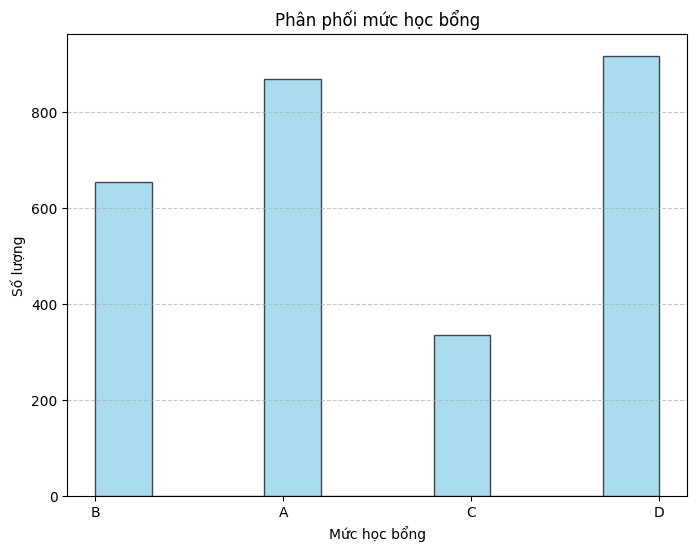

In [21]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ phân phối của cột "Muc_hb"
plt.figure(figsize=(8, 6))
plt.hist(concatenated_df['Muc_hb'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Mức học bổng')
plt.ylabel('Số lượng')
plt.title('Phân phối mức học bổng')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [22]:
concatenated_df

,Khoa,Nganh,Muc_hb,GPA,drl,ki_hoc
0,1.0,Công nghệ da giày,B,3.2,80.0,1
1,1.0,Công nghệ may,A,3.6,90.0,1
2,1.0,Công nghệ may,B,3.2,80.0,1
3,1.0,Công nghệ thông tin,A,3.6,90.0,1
4,1.0,Công nghệ thông tin,B,3.2,80.0,1
...,...,...,...,...,...,...
913,7,Vật lý Y khoa,D,2.54,54,2
914,7,Vật lý Y khoa,D,1.6,50,2
915,7,Dệt May K67,D,2.51,54,2
916,7,Dệt May K67,D,3.04,75,2


In [23]:
def muc_hb_scale(x):
  if x == 'A': return 0
  elif x == 'B': return 1
  elif x == 'C' : return 2
  else: return 3

In [24]:
concatenated_df['Muc_hb'] = concatenated_df['Muc_hb'].map(muc_hb_scale)

In [25]:
labels = concatenated_df['Muc_hb']
feature_df = concatenated_df.drop('Muc_hb', axis = 1)

In [26]:
def convert_onehot(df, column):
  df_onehot = pd.get_dummies(df, columns=[column])
  df = df_onehot.apply(lambda x: x.replace({True: 1, False: 0}))
  return df

In [27]:
df_onehot = convert_onehot(feature_df, 'Nganh')

In [28]:
df_onehot.head()

,Khoa,GPA,drl,ki_hoc,Nganh_An toàn thông tin,Nganh_Công nghệ da giày,"Nganh_Công nghệ dệt, may",Nganh_Công nghệ giáo dục,Nganh_Công nghệ kỹ thuật cơ khí,Nganh_Công nghệ may,...,Nganh_Ngôn ngữ Anh,Nganh_Quản lý công nghiệp,Nganh_Quản lý tài nguyên và Môi trường,Nganh_Quản trị kinh doanh,Nganh_Sư phạm Kỹ thuật công nghiệp,Nganh_Toán-Tin,Nganh_Truyền thông số và Kỹ thuật đa phương tiện,Nganh_Tài chính-Ngân hàng,Nganh_Vật lý Y khoa,Nganh_Vật lý kỹ thuật
0,1.0,3.2,80.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,3.6,90.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1.0,3.2,80.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1.0,3.6,90.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,3.2,80.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def scaler_GPA(x):
  return x / 4.0
def scaler_drl(x):
  return x / 100.0

# Scale cột đó
df_onehot.loc[:, 'GPA'] = scaler_GPA(df_onehot['GPA'])
df_onehot.loc[:, 'drl'] = scaler_drl(df_onehot['drl'])


In [30]:
df_onehot.head(20)

,Khoa,GPA,drl,ki_hoc,Nganh_An toàn thông tin,Nganh_Công nghệ da giày,"Nganh_Công nghệ dệt, may",Nganh_Công nghệ giáo dục,Nganh_Công nghệ kỹ thuật cơ khí,Nganh_Công nghệ may,...,Nganh_Ngôn ngữ Anh,Nganh_Quản lý công nghiệp,Nganh_Quản lý tài nguyên và Môi trường,Nganh_Quản trị kinh doanh,Nganh_Sư phạm Kỹ thuật công nghiệp,Nganh_Toán-Tin,Nganh_Truyền thông số và Kỹ thuật đa phương tiện,Nganh_Tài chính-Ngân hàng,Nganh_Vật lý Y khoa,Nganh_Vật lý kỹ thuật
0,1.0,0.800,0.80,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0.900,0.90,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0.800,0.80,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0.900,0.90,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0.800,0.80,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1.0,0.800,0.80,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1.0,0.625,0.65,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.0,0.800,0.80,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.0,0.900,0.90,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1.0,0.800,0.80,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
import pandas as pd
import tensorflow as tf


# Chuyển đổi DataFrame thành tf.dataset
def df_to_dataset(features, labels, shuffle=True, batch_size=32):

    ds = tf.data.Dataset.from_tensor_slices((features, labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=10000)
    ds = ds.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)
    return ds

# Sử dụng hàm df_to_dataset để chuyển đổi
batch_size = 32
dataset = df_to_dataset(df_onehot,labels , batch_size=batch_size)

dataset


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 59), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [32]:
def split_train_test(dataset, train_ratio=0.8):
    dataset_size = len(dataset)
    train_size = int(train_ratio * dataset_size)
    train_dataset = dataset.take(train_size)
    test_dataset = dataset.skip(train_size)
    return train_dataset, test_dataset

train_dataset, test_dataset = split_train_test(dataset, train_ratio=0.8)

In [33]:
train_dataset

<_TakeDataset element_spec=(TensorSpec(shape=(None, 59), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [34]:
num_classes = labels.nunique()

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(16, activation = 'relu', input_shape =(list(train_dataset.take(1))[0][0].shape[1],)),
    Dense(8, activation = 'relu'),
    Dropout(0.2),
    Dense(4, activation = 'relu'),
    Dense(num_classes, activation = 'softmax')
])


In [46]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

# Tiến hành huấn luyện mô hình
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['acc'])
model.fit(train_dataset, epochs=50, validation_data=test_dataset)


Epoch 1/50
69/69 [==============================] - 4s 6ms/step - loss: 0.3997 - acc: 0.8415 - val_loss: 0.2916 - val_acc: 0.8981
Epoch 2/50
69/69 [==============================] - 0s 4ms/step - loss: 0.4108 - acc: 0.8388 - val_loss: 0.3092 - val_acc: 0.9033
Epoch 3/50
69/69 [==============================] - 0s 4ms/step - loss: 0.4043 - acc: 0.8356 - val_loss: 0.2973 - val_acc: 0.8910
Epoch 4/50
69/69 [==============================] - 0s 4ms/step - loss: 0.3935 - acc: 0.8474 - val_loss: 0.3521 - val_acc: 0.8559
Epoch 5/50
69/69 [==============================] - 0s 4ms/step - loss: 0.4092 - acc: 0.8442 - val_loss: 0.3162 - val_acc: 0.8858
Epoch 6/50
69/69 [==============================] - 0s 4ms/step - loss: 0.3933 - acc: 0.8392 - val_loss: 0.3117 - val_acc: 0.8946
Epoch 7/50
69/69 [==============================] - 0s 4ms/step - loss: 0.3997 - acc: 0.8356 - val_loss: 0.3400 - val_acc: 0.8664
Epoch 8/50
69/69 [==============================] - 0s 4ms/step - loss: 0.3976 - acc: 0.83

In [47]:
lists = [4.    , 1, 1  , 2.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 1.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    ]

In [48]:
import tensorflow as tf

i = np.expand_dims(np.array(lists), axis = 0)
predictions = model.predict(i)

print(np.argmax(predictions, axis = 1))


1/1 [==============================] - 0s 62ms/step
[0]


In [49]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [50]:
# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)